In [164]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [165]:
from IPython.display import Audio
import warnings
if not sys.warnoptions:
  warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [166]:
Ravdessdata="C:\\Users\\navee\\Downloads\\speech_recognition\\audio_speech_actors_01-24\\"

In [167]:
ravdess_directory_list = os.listdir(Ravdessdata)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
 
    actor = os.listdir(Ravdessdata + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
      
        file_emotion.append(int(part[2]))
        file_path.append(Ravdessdata + dir + '/' + file)
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\navee\Downloads\speech_recognition\au...
1,neutral,C:\Users\navee\Downloads\speech_recognition\au...
2,neutral,C:\Users\navee\Downloads\speech_recognition\au...
3,neutral,C:\Users\navee\Downloads\speech_recognition\au...
4,calm,C:\Users\navee\Downloads\speech_recognition\au...


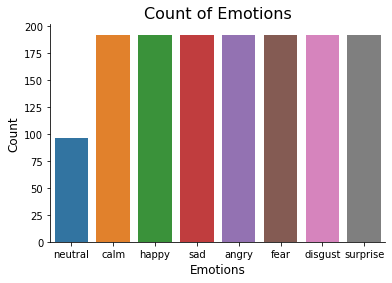

In [168]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [169]:
import librosa.display
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar() 

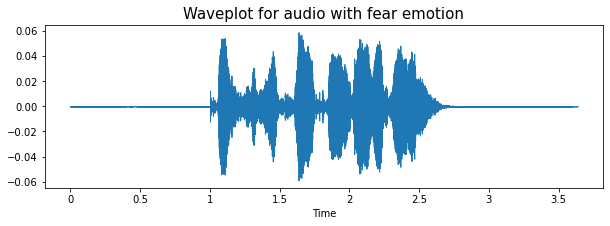

C:\Users\navee\Downloads\speech_recognition\audio_speech_actors_01-24\Actor_01/03-01-06-01-01-02-01.wav


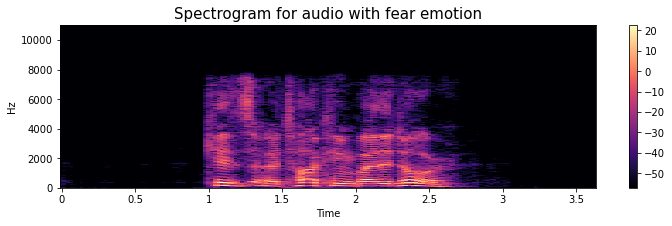

In [277]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
print(path)
Audio(path)

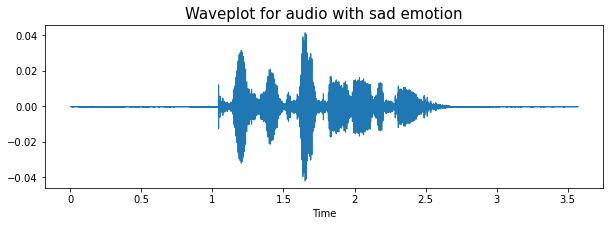

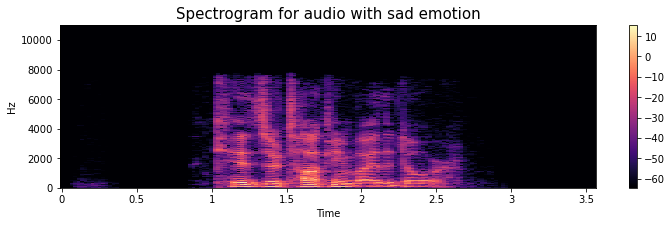

In [171]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

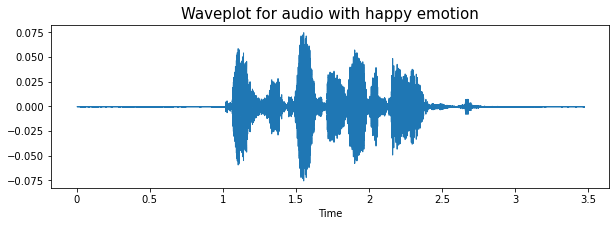

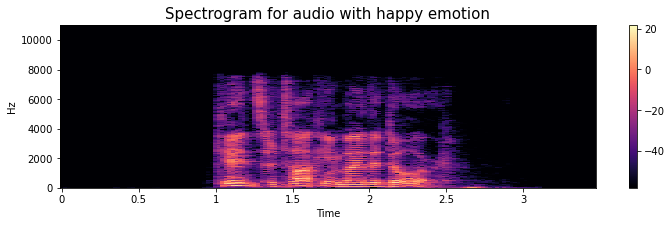

In [172]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [173]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [174]:

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [175]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\navee\\Downloads\\speech_recognition\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [253]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [254]:
x_train

array([[-5.22061890e+02,  3.50668907e+01,  3.75342965e+00, ...,
         1.65243153e-04,  1.04321596e-04,  6.55571566e-05],
       [-6.41227722e+02,  4.49487762e+01, -1.85174108e+00, ...,
         3.89261913e-05,  3.05255380e-05,  2.94166657e-05],
       [-6.50705750e+02,  5.30211639e+01, -4.92040443e+00, ...,
         4.75216802e-05,  3.46632514e-05,  1.62844426e-05],
       ...,
       [-5.50096191e+02,  1.70297680e+01, -1.14575644e+01, ...,
         1.51764631e-04,  1.16828531e-04,  8.47479314e-05],
       [-5.55357605e+02,  4.71569710e+01,  1.10750732e+01, ...,
         1.61086471e-04,  1.04962463e-04,  6.52811723e-05],
       [-5.04816345e+02,  3.53618660e+01, -1.43495789e+01, ...,
         6.08151546e-04,  5.55269769e-04,  4.47782222e-04]])

In [255]:

print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [256]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [257]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [258]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [259]:
y_pred=model.predict(x_test)


In [260]:
y_pred

array(['happy', 'fearful', 'happy', 'happy', 'disgust', 'calm', 'happy',
       'happy', 'disgust', 'happy', 'happy', 'disgust', 'fearful',
       'happy', 'disgust', 'happy', 'calm', 'disgust', 'fearful',
       'disgust', 'disgust', 'disgust', 'disgust', 'calm', 'happy',
       'happy', 'happy', 'happy', 'fearful', 'happy', 'happy', 'fearful',
       'happy', 'fearful', 'happy', 'fearful', 'calm', 'fearful', 'calm',
       'disgust', 'happy', 'calm', 'calm', 'calm', 'fearful', 'disgust',
       'disgust', 'happy', 'calm', 'happy', 'fearful', 'fearful',
       'fearful', 'fearful', 'happy', 'fearful', 'disgust', 'happy',
       'calm', 'calm', 'disgust', 'calm', 'happy', 'calm', 'disgust',
       'calm', 'happy', 'disgust', 'disgust', 'happy', 'fearful',
       'fearful', 'fearful', 'fearful', 'fearful', 'disgust', 'fearful',
       'happy', 'fearful', 'fearful', 'disgust', 'calm', 'fearful',
       'calm', 'disgust', 'disgust', 'disgust', 'fearful', 'happy',
       'fearful', 'disgus

In [261]:

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)


print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 71.35%


In [262]:
y_train_pred=model.predict(x_train) 

In [263]:
accuracy_train=accuracy_score(y_true=y_train, y_pred=y_train_pred)


print("Accuracy: {:.2f}%".format(accuracy_train*100))

Accuracy: 90.62%


In [251]:
from sklearn.metrics import f1_score

In [252]:
f1_score(y_test, y_pred,average=None)

array([0.77575758, 0.44155844, 0.62222222, 0.61538462])

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        calm       0.82      0.63      0.71        57
     disgust       0.69      0.52      0.60        48
     fearful       0.64      0.81      0.71        37
       happy       0.57      0.74      0.64        50

    accuracy                           0.67       192
   macro avg       0.68      0.68      0.67       192
weighted avg       0.69      0.67      0.67       192



In [190]:
import pickle

with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [191]:
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,happy,happy
1,calm,fearful
2,happy,happy
3,happy,happy
4,disgust,fearful
5,calm,happy
6,happy,happy
7,happy,disgust
8,disgust,calm
9,happy,happy


In [278]:

filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) 

feature=extract_feature("C:\\Users\\navee\\Downloads\\speech_recognition\\audio_speech_actors_01-24\\Actor_01//03-01-06-01-01-02-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
print(prediction[0])


fearful


In [279]:
Audio("C:\\Users\\navee\\Downloads\\speech_recognition\\audio_speech_actors_01-24\\Actor_01//03-01-06-01-01-02-01.wav")